In [1]:
import numpy as np
import pandas as pd
import sys
import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt
sys.path.append("/Users/nicolacecere/GitHub/UPM-Master/Complex-data-health/scripts")
import localization
import separation
import proximity
import preprocessing
import utils

In [2]:
dt = pd.read_csv('/Users/nicolacecere/GitHub/UPM-Master/Complex-data-health/data/drug_target.csv')

cleaned_dt = dt[dt.organism=='Humans'][['Gene_Target', 
                                        'Name']].drop_duplicates()

In [3]:
# Replace 'your_disease_gene_file.csv' with your actual file path
dga_file_path = '/Users/nicolacecere/GitHub/UPM-Master/Complex-data-health/data/disease_gene.tsv'
ppi_file_path = '/Users/nicolacecere/GitHub/UPM-Master/Complex-data-health/data/PPI.csv'

dga, ppi = preprocessing.preprocess_disease(ppi_file_path, dga_file_path)

In [6]:
gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

# Removing self loops
sl = nx.selfloop_edges(gppi)
gppi.remove_edges_from(sl)

In [7]:
dmt = utils.get_disease_module_info("dementia", dga, gppi, gppi)

Number of disease genes:  17
Number of disease genes in the PPI:  17
Number of disease genes in the LCC:  6


In [8]:
cleaned_dt[cleaned_dt.Gene_Target.isin(dmt[2])][['Name']].drop_duplicates()

,Name
3422,Lansoprazole
5027,Astemizole
5782,Deferoxamine
5896,Tetracycline
9298,Paclitaxel
9505,Docetaxel
9954,Aluminium
10633,Zinc
12613,Resveratrol
14312,Tromethamine


Lansoprazole
	Targets:  ['ATP4A' 'MAPT' 'CYP1A1' 'CYP1B1' 'CYP2C8' 'CYP2C9' 'CYP2C18' 'CYP2D6'
 'CYP3A4' 'CYP2C19' 'ABCG2' 'ABCB1' 'SLC22A8' 'SLC22A1' 'SLC22A2'
 'SLC22A3']
Proximity observed:  1.1666666666666667

Mean:  1.8239999999999998
Std:  0.15026495118807828
z-score:  -4.374495370584359
p-value:  1.2171370598945686e-05


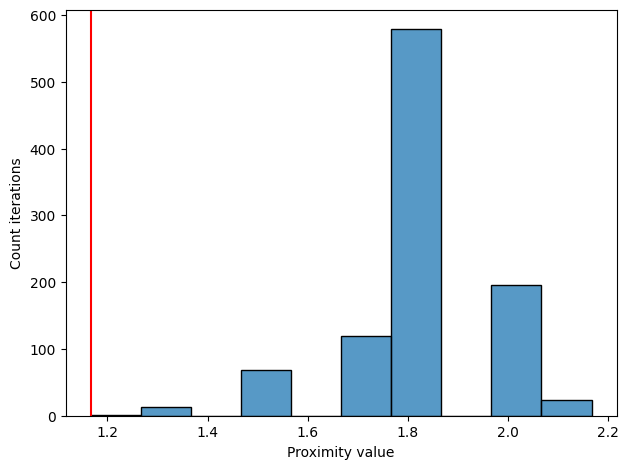

In [13]:
le_t = cleaned_dt[cleaned_dt.Name == 'Lansoprazole'].Gene_Target.unique()
print('Lansoprazole')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)

Astemizole
	Targets:  ['HRH1' 'KCNH2' 'KCNH1' 'MAPT' 'CYP3A4' 'CYP3A5' 'CYP3A7' 'CYP2D6'
 'CYP2J2' 'ABCB1' 'ABCB11']
Proximity observed:  1.1666666666666667

Mean:  1.8366666666666664
Std:  0.139204086785474
z-score:  -4.8130770832362835
p-value:  1.486239291192959e-06


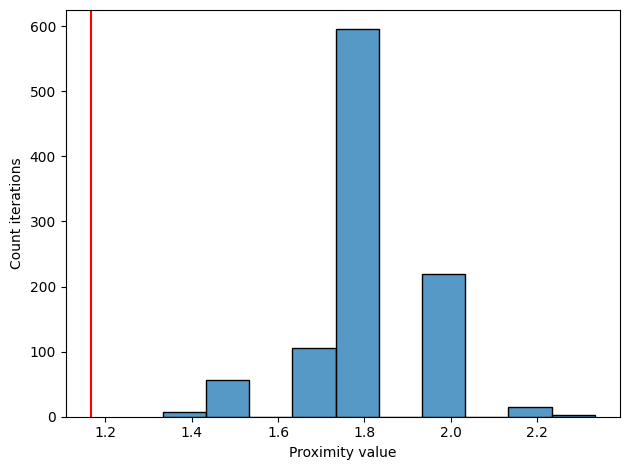

In [17]:
le_t = cleaned_dt[cleaned_dt.Name == 'Astemizole'].Gene_Target.unique()
print('Astemizole')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)

Lepirudin
	Targets:  ['F2']
Proximity observed:  2.6666666666666665

Mean:  2.6274999999999995
Std:  0.16259826088997523
z-score:  0.2408799851381546
p-value:  0.8096481350045854


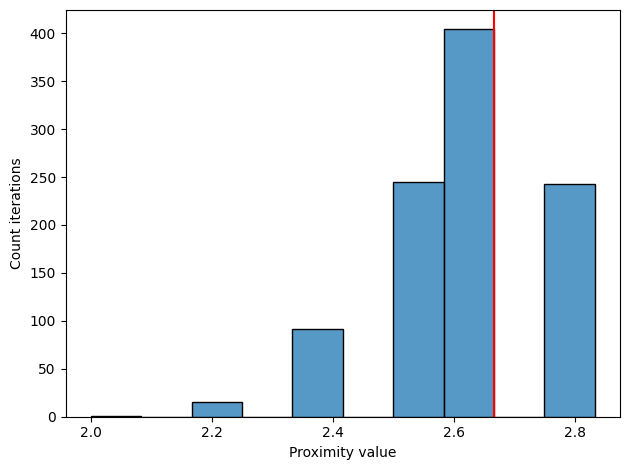

In [16]:
le_t = cleaned_dt[cleaned_dt.Name == 'Lepirudin'].Gene_Target.unique()
print('Lepirudin')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)

Cetuximab
	Targets:  ['EGFR' 'FCGR3B' 'C1QA' 'C1QB' 'C1QC' 'FCGR3A' 'FCGR1A' 'FCGR2A']
Proximity observed:  1.6666666666666667

Mean:  1.7498333333333331
Std:  0.12179205867196574
z-score:  -0.682857877381539
p-value:  0.49469665312556055


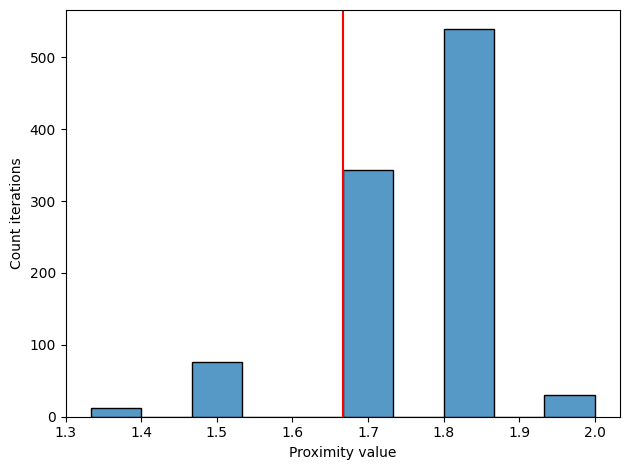

In [18]:
le_t = cleaned_dt[cleaned_dt.Name == 'Cetuximab'].Gene_Target.unique()
print('Cetuximab')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)

Memantine
	Targets:  ['HTR3A' 'CHRNA7' 'DRD2' 'GRIN1' 'GABRA1' 'GLRA1' 'CYP2B6' 'CYP2A6'
 'CYP2C19' 'SLC22A2' 'SLC9A1' 'SLC22A4' 'SLC47A1']
Proximity observed:  2.0

Mean:  2.0216666666666665
Std:  0.09175753072333867
z-score:  -0.2361295742797877
p-value:  0.8133321257504427


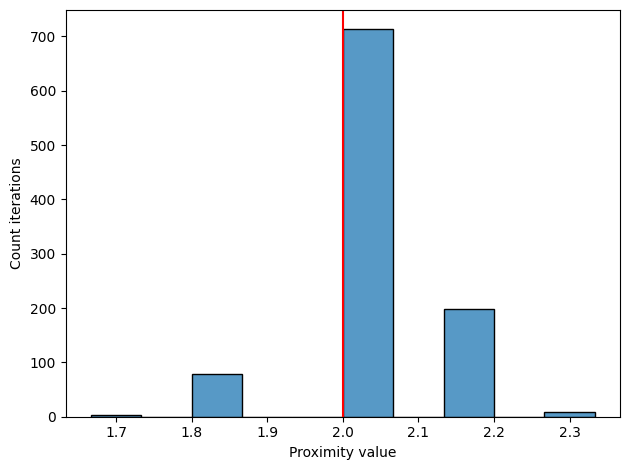

In [19]:
le_t = cleaned_dt[cleaned_dt.Name == 'Memantine'].Gene_Target.unique()
print('Memantine')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)